<a href="https://colab.research.google.com/github/maggiewong8/NYC_restaurant_health_grades_analysis/blob/master/Copy_of_MaggieWongFinalProjectPYTH122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Where in the city has the most sanitary (and not) restaurants?
---

If you've ever walked past a restaurant or your favorite grab and go lunch spot, you've noticed a grade. I want to figure out where in the city has the most violations and where in the city has the cleanest restaurants in nyc.... also, which are potentially the most shocking not clean restuarants. is it your favorite restaurant?

In [1]:
#IMPORT LIBRARIES FIRST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

plt.style.use('fivethirtyeight') 

plt.rcParams['figure.figsize'] = (8, 6) 
plt.rcParams['font.size'] = 14

print('done')



done


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls '/content/gdrive/My Drive/Maggie Wong PYTH122'

DOHMH_New_York_City_Restaurant_Inspection_Results.csv
neighborhood_zipcodes.csv


In [4]:
# IMPORT DATASETS FROM GOOGLE DRIVE AND SOME TESTS BELOW
health_grades_orig = pd.read_csv('/content/gdrive/My Drive/Maggie Wong PYTH122/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
health_grades = health_grades_orig.copy()
neighborhood_by_zip_orig = pd.read_csv('/content/gdrive/My Drive/Maggie Wong PYTH122/neighborhood_zipcodes.csv')
neighborhood_by_zip = neighborhood_by_zip_orig

print('done')

done


In [0]:
#neighborhood_by_zip_orig

In [0]:
# health_grades
#neighborhood_by_zip

In [0]:
# health_grades.info()
# neighborhood_by_zip.info()

# Let's make this dataset readable and useful for our study. 
We are going to only include critical flag violations, which includes:

*   Food at wrong temp 
*   Not having sink 
*   Vermon (ew)

For more info https://www1.nyc.gov/assets/doh/downloads/pdf/rii/blue-book.pdf

In [0]:
health_grades = health_grades[['DBA', 'CUISINE DESCRIPTION', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'INSPECTION DATE', 'CRITICAL FLAG', 'VIOLATION DESCRIPTION' ]]


In [9]:
health_grades.rename(columns={'DBA': 'NAME'}, inplace=True)
health_grades.columns

Index(['NAME', 'CUISINE DESCRIPTION', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'INSPECTION DATE', 'CRITICAL FLAG', 'VIOLATION DESCRIPTION'],
      dtype='object')

In [0]:
health_grades['YEAR'] = pd.to_datetime(health_grades['INSPECTION DATE']).dt.year
health_grades = health_grades[['NAME', 'CUISINE DESCRIPTION', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'YEAR', 'INSPECTION DATE', 'CRITICAL FLAG', 'VIOLATION DESCRIPTION' ]]
health_grades = health_grades[health_grades['CRITICAL FLAG'] == 'Y']
#health_grades.head(2)

In [11]:
# HOW TO CONVERT TO A DICTIONARY. GOAL IS TO BE ABLE TO CREATE SEARCHABLE RESTAURANTS BY NEIGHBORHOOD
# neighborhood_by_zip = neighborhood_by_zip[['NEIGHBORHOOD', 'ZIPCODES']]
# # neighborhood_by_zip
# neighborhood_dict = neighborhood_by_zip.to_dict() 
# neighborhood_dict

neighborhood_zip_dict = {}

for row in neighborhood_by_zip.iterrows():
  data = row[1]
  zipcodes = data["ZIPCODES"].split(',')
  zip_as_int = []
  for zipcode in zipcodes:
    zip_as_int.append(int(zipcode.strip()))

  neighborhood_zip_dict[data["NEIGHBORHOOD"]] = zip_as_int

neighborhood_zip_dict

{'Borough Park': [11204, 11218, 11219, 11230],
 'Bronx Park and Fordham': [10458, 10467, 10468],
 'Bushwick and Williamsburg': [11206, 11221, 11237],
 'Canarsie and Flatlands': [11234, 11236, 11239],
 'Central Bronx': [10453, 10457, 10460],
 'Central Brooklyn': [11212, 11213, 11216, 11233, 11238],
 'Central Harlem': [10026, 10027, 10030, 10037, 10039],
 'Central Queens': [11365, 11366, 11367],
 'Chelsea and Clinton': [10001, 10011, 10018, 10019, 10020, 10036],
 'East Harlem': [10029, 10035],
 'East New York and New Lots': [11207, 11208],
 'Flatbush': [11203, 11210, 11225, 11226],
 'Gramercy Park and Murray Hill': [10010, 10016, 10017, 10022],
 'Greenpoint': [11211, 11222],
 'Greenwich Village and Soho': [10012, 10013, 10014],
 'High Bridge and Morrisania': [10451, 10452, 10456],
 'Hunts Point and Mott Haven': [10454, 10455, 10459, 10474],
 'Inwood and Washington Heights': [10031, 10032, 10033, 10034, 10040],
 'Jamaica': [11412, 11423, 11432, 11433, 11434, 11435, 11436],
 'Kingsbridge a

In [0]:
# health_grades

# Restaurant Search by ZIP and Name

name of resturant: DIG INN
zipcode: 10003


Text(0.5, 0.98, 'DIG INN Critical Violations located in ZIP 10003')

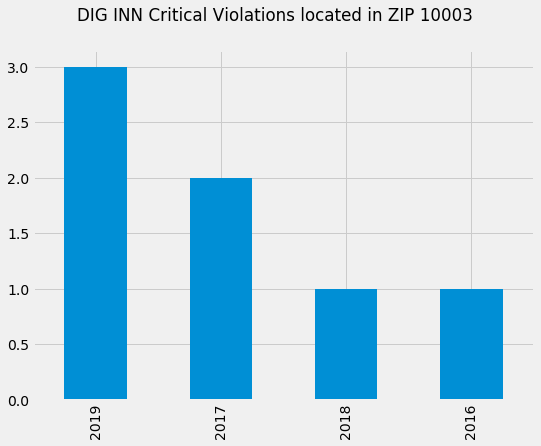

In [14]:
rest_variable = input('name of resturant: ')
rest_variable = rest_variable.upper()
zip_variable = input('zipcode: ')
zip_variable_float = float(zip_variable)

health_grades_specific_restaurant= health_grades[health_grades['NAME'] == rest_variable]

rest_in_zip = health_grades_specific_restaurant[health_grades_specific_restaurant['ZIPCODE'] == zip_variable_float]

rest_in_zip['YEAR'].value_counts().head().plot(kind='bar', x='Year', y='Number of Critial Violations')
plt.suptitle(rest_variable + ' Critical Violations located in ZIP ' + str(zip_variable))




#If you want to see what violations they got... run the code below. 
Sorted by most recent violations

In [15]:
rest_in_zip.sort_values(by=['YEAR', 'INSPECTION DATE'] , ascending=[False, False])

,NAME,CUISINE DESCRIPTION,BORO,BUILDING,STREET,ZIPCODE,YEAR,INSPECTION DATE,CRITICAL FLAG,VIOLATION DESCRIPTION
104833,DIG INN,American,Manhattan,17,East 17th Street,10003.0,2019,11/07/2019,Y,Filth flies or food/refuse/sewage-associated (...
137435,DIG INN,American,Manhattan,17,East 17th Street,10003.0,2019,11/07/2019,Y,"Sanitized equipment or utensil, including in-u..."
336559,DIG INN,American,Manhattan,17,East 17th Street,10003.0,2019,11/07/2019,Y,Hot food item not held at or above 140º F.
122608,DIG INN,American,Manhattan,17,East 17th Street,10003.0,2018,11/26/2018,Y,Hot food item not held at or above 140º F.
176967,DIG INN,American,Manhattan,17,East 17th Street,10003.0,2017,12/07/2017,Y,Cold food item held above 41º F (smoked fish a...
331648,DIG INN,American,Manhattan,17,East 17th Street,10003.0,2017,02/01/2017,Y,Food not cooled by an approved method whereby ...
353863,DIG INN,American,Manhattan,17,East 17th Street,10003.0,2016,12/07/2016,Y,Hot food item not held at or above 140º F.


Text(0.5, 0.98, 'TOP 10 ZIPS WITH MOST VIOLATIONS IN NYC IN 2019')

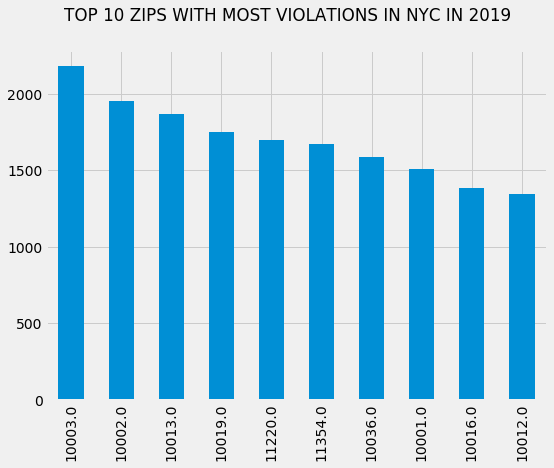

In [16]:
health_grades_2019= health_grades[health_grades['YEAR'] == 2019]

health_grades_2019['ZIPCODE'].value_counts().head(10).plot(kind='bar')
plt.suptitle('TOP 10 ZIPS WITH MOST VIOLATIONS IN NYC IN 2019')


Text(0.5, 0.98, '10 ZIPS WITH LEAST VIOLATIONS IN NYC IN 2019')

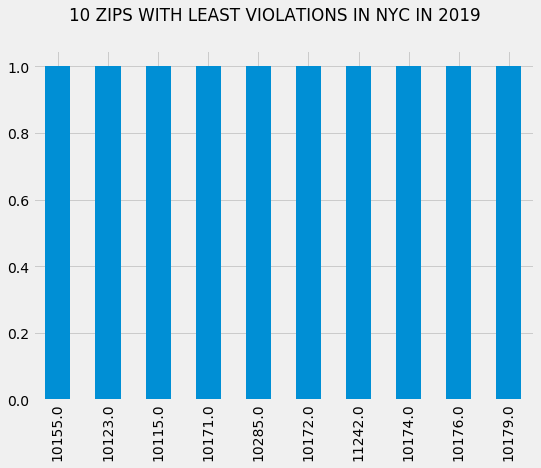

In [17]:
health_grades_2019['ZIPCODE'].value_counts().tail(10).plot(kind='bar')
plt.suptitle('10 ZIPS WITH LEAST VIOLATIONS IN NYC IN 2019')



Text(0.5, 0.98, 'CUSINES WITH MOST VIOLATIONS IN NYC IN 2019')

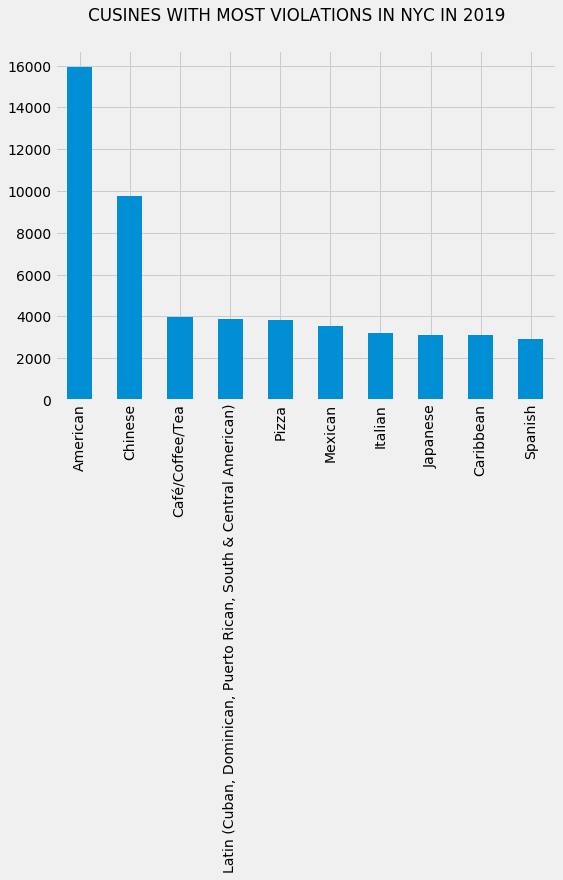

In [18]:
health_grades_2019['CUISINE DESCRIPTION'].value_counts().head(10).plot(kind='bar')
plt.suptitle('CUSINES WITH MOST VIOLATIONS IN NYC IN 2019')